In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Classification view

In [8]:
df = pd.read_csv('../data/outputs/classifications.csv')

In [9]:
df.head()

,nome,sentimento,frase
0,Vinícius Fontes de Andrade,1,O Ararabots me proporcionou experiências e mel...
1,Lucas Santana Escobar,1,"Além disto, formou laços de amizade duradouros..."
2,Matheus Kazumi Silva Miyashiro,1,"Do ponto de vista técnico, pude aplicar e apro..."
3,Guilherme Brugeff Teles,1,Me ajudou a desenvolver minha capacidade de in...
4,João Valente,0,A participação no AraraBots ainda não teve um ...


In [10]:
data = df['sentimento'].copy()
data = data.to_numpy()
data

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

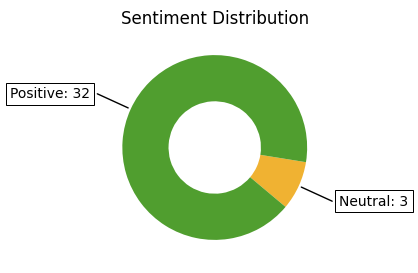

In [16]:
label_map = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}
color_map = {
    -1: '#971B2F',  # vermelho forte
     0: '#F0B232',  # cinza-azulado neutro
     1: '#509E2F'   # verde moderado
}


counts = df['sentimento'].value_counts().sort_index()
data = counts.values
labels = [label_map[i] for i in counts.index]
colors = [color_map[i] for i in counts.index]

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(data, colors=colors, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    ha = "right" if x < 0 else "left"
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(f"{labels[i]}: {data[i]}", xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=ha, **kw)

ax.set_title("Sentiment Distribution")
plt.show()
